In [18]:
import cv2
import pickle 
from scipy.io import loadmat
import numpy as np

In [19]:

pts_cam = loadmat('/home/jc3342/calib_cam_rectify/calib_test/data_calib/pts_groups/pts_cam.mat')
pts_lidar = loadmat('/home/jc3342/calib_cam_rectify/calib_test/data_calib/pts_groups/pts_lidar.mat')



pts_cam = pts_cam['CornerPoints_cam']
pts_lidar = pts_lidar['CornerPoints_lidar']

# idx = np.random.choice(len(pts_cam), int(len(pts_cam)/3*3))
# pts_cam =pts_cam [idx,:]
# pts_lidar = pts_lidar[idx,:]
pts_cam.shape

(972, 2)

In [20]:
pts_cam = pts_cam.reshape(1,-1, 2)
pts_cam = np.float32(pts_cam)

pts_lidar = pts_lidar.reshape(1,-1,3)
pts_lidar = np.float32(pts_lidar)


In [21]:
root = "/home/yy785/carlos/SkynetData/GPS_plotting/location_matching/calib_test/params"
mtx_path = root + "/camera_matrix.npy"
dist_path = root + "/distortion_coefficients.npy"
mtx_path = "/home/jc3342/calib_cam/params/cam0/camera_matrix.npy"
dist_path = "/home/jc3342/calib_cam/params/cam0/distortion_coefficients.npy"
mtx = np.load(mtx_path)
dist = np.load(dist_path)
print(mtx)
print(dist)


[[1.94545773e+03 0.00000000e+00 9.09634215e+02]
 [0.00000000e+00 1.95343252e+03 5.96396405e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-0.23331005 -0.18131323 -0.00462693  0.0072827   0.47503205]]


In [22]:

ret, camera_matrix, distortion_coefficients, rvecs, tvecs = cv2.calibrateCamera(
        pts_lidar, pts_cam, (1208, 1920), mtx, dist, flags=(cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_FIX_K1 + cv2.CALIB_FIX_K2 +  cv2.CALIB_FIX_K3)
)


# camera_matrix = np.load('camera_matrix.npy')
# distortion_coefficients = np.load('distortion_coefficients.npy')
# rvecs = np.load('rvecs.npy')
# tvecs = np.load('tvecs.npy')
R_new = cv2.Rodrigues(rvecs[0])[0]
T_new = tvecs[0]

In [14]:
root = "/home/yy785/carlos/SkynetData/GPS_plotting/location_matching/calib_test/params"
camera_matrix = np.load(root + "/camera_matrix.npy")
distortion_coefficients = np.load(root + "/distortion_coefficients.npy")
rvecs = np.load(root + "/rvecs.npy")
tvecs = np.load(root + "/tvecs.npy")
R_new = np.load(root + "/Rot.npy")
T_new = np.load(root + "/T.npy")

(1208, 1920, 3)

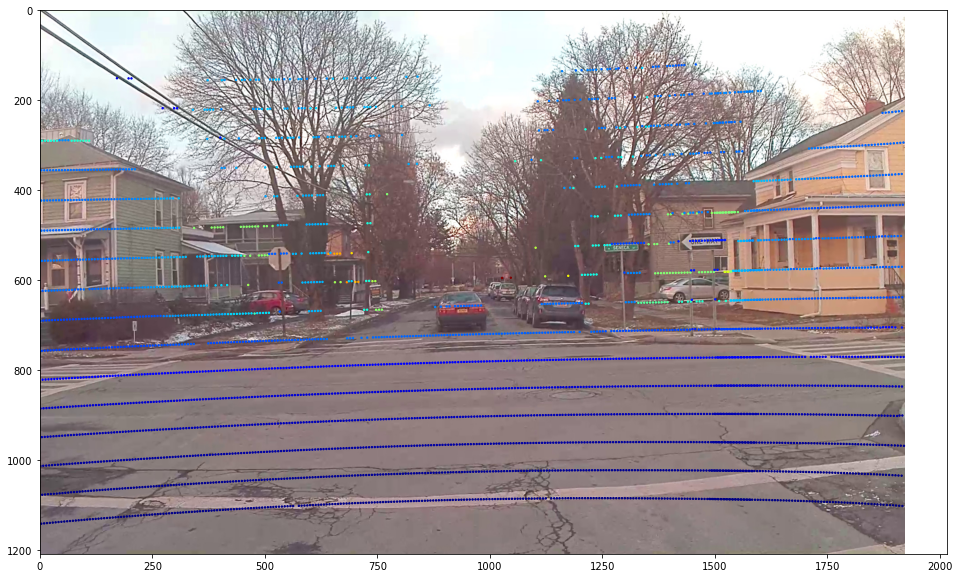

In [30]:
import matplotlib.pyplot as plt
from matplotlib import cm
import glob
import os 

cmap = cm.get_cmap('jet')

# lidar_file = '/home/yy785/carlos/SkynetData/GPS_plotting/location_matching/calib_test/data2/cache/lidar_203/data/1607112277437436'
# img_file = '/home/yy785/carlos/SkynetData/GPS_plotting/location_matching/calib_test/data2/cache/camera_front_left_60fov/1607112277504625.jpg'
# img_file = '/home/yy785/carlos/SkynetData/GPS_plotting/location_matching/calib_test/data2/cache/camera_front_left_60fov/1607112176637158.jpg'
# lidar_file = '/home/yy785/carlos/SkynetData/GPS_plotting/location_matching/calib_test/data2/cache/lidar_203/data/1607112176577423'
# img_file = '/home/xc429/Junan/calib_test/data2/cache/camera_front_left_60fov/1607111874001474.jpg'
# lidar_file = '/home/xc429/Junan/calib_test/data2/cache/lidar_203/data/1607111873997399'

img_root = '/home/yy785/carlos/SkynetData/dest_dir/amodal2/01-20-2021/'
lidar_root = '/home/yy785/carlos/SkynetData/dest_dir/amodal2/01-20-2021/'
# imagesL = sorted(glob.glob(os.path.join(img_root, 'cache/camera_front_left_60fov/*')))
# imagesR = sorted(glob.glob(os.path.join(img_root, 'cache/camera_front_middle_60fov/*')))

# lidar_files = sorted(glob.glob(os.path.join(lidar_root, 'decoded_lidar/*')))
lidar_files = sorted(glob.glob(os.path.join(lidar_root, 'cache/unwrapped_velodyne/*')))
lidar_files = sorted(glob.glob(os.path.join(lidar_root, 'cache/lidar_203/data/*')))
idx = 5100
img = plt.imread(imagesL[idx])
lidar_file = lidar_files[idx]
# img = plt.imread(img_file)

def load_pcl_from_bin5(bin_file_path):
    bin_pcd = np.fromfile(bin_file_path,dtype=np.float32)
    points = bin_pcd.reshape(-1,5)
    return points[:,:3],points[:,3],points[:,4]
def load_pcl_from_bin4(bin_file_path):
    bin_pcd = np.fromfile(bin_file_path,dtype=np.float32)
    points = bin_pcd.reshape(-1,4)
    return points[:,:3],points[:,3], None

pts, intensity, times = load_pcl_from_bin5(lidar_file)
pts_cam = np.dot(R_new,pts.T) + T_new.reshape(-1,1) 
pts_cam = pts_cam.T
pts = pts[pts_cam[:,2]>=0,:] 
pts_cam = pts_cam[pts_cam[:,2]>=0,:] 

pixels, _ = cv2.projectPoints(pts.reshape(1,-1,3), rvecs[0], tvecs[0], camera_matrix,  distortion_coefficients)
u = pixels[:,0,0]
v = pixels[:,0,1]
# pts within the img 
idx = (u>0)*(u<1920)*(v>0)*(v<1208)
u = u[idx]
v=v[idx]
plt.figure(figsize = (150,10))
plt.imshow(img)
plt.scatter(u,v,c=pts_cam[idx,2], s = 2,cmap = cmap)
img.shape

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import glob
root = '/home/xc429/Junan/calib_test/data2/cache'
img_dir = os.path.join(root,'camera_front_left_60fov/*')
img_files = glob.glob(img_dir)

cmap = cm.get_cmap('jet')

img_file = '/home/xc429/Junan/calib_test/data2/cache/camera_front_left_60fov/1607112277504625.jpg'

img = cv2.imread(img_file )
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx, dist,(w,h),1,(w,h))
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

plt.figure(figsize = (150,15))
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.imshow(dst)

In [ ]:
mtx

In [10]:
import numpy as np
import os 
import os.path as osp
import matplotlib.pyplot as plt

camL, camR = "cam0", "cam1"

# the parameters in the root are re-optimized in the calibration between cam and lidar
root = "/home/jc3342/calib_cam_rectify/params/"
RotL = np.load(os.path.join(root, camL, "Rot.npy"))
TL = np.load(os.path.join(root, camL, "T.npy"))
RotR = np.load(os.path.join(root, camR, "Rot.npy"))
TR = np.load(os.path.join(root, camR , "T.npy"))

#camera_matrix =np.load(osp.join(params_dir,'camera_matrix.npy'))
#distortion_coefficients = np.load(osp.join(params_dir,'distortion_coefficients.npy'))
# RotL = np.load(osp.join(params_dir,'Rot.npy'))
# TL = np.load(osp.join(params_dir, 'T.npy'))

extrinsicsL = np.vstack((np.hstack((RotL, TL)), np.array([[0,0,0,1]])))
extrinsicsR = np.vstack((np.hstack((RotR, TR)), np.array([[0,0,0,1]])))

extrinsic = np.dot(extrinsicsR, np.linalg.inv(extrinsicsL))
R_rel = extrinsic[:3, :3]
T_rel = extrinsic[:3, 3]

intrinsic_root = "/home/jc3342/calib_cam_rectify/params"
instrinsicL = np.load(os.path.join(intrinsic_root, camL, "camera_matrix.npy"))
instrinsicR = np.load(os.path.join(intrinsic_root, camR, "camera_matrix.npy"))
camera_matrix = instrinsicR
distCoeffL = np.load(os.path.join(intrinsic_root, camL, "distortion_coefficients.npy"))
distCoeffR = np.load(os.path.join(intrinsic_root, camR, "distortion_coefficients.npy"))
distortion_coefficients = distCoeffR

rvecs = np.load(os.path.join(intrinsic_root, camR, "rvecs.npy"))
tvecs = np.load(os.path.join(intrinsic_root, camR, "tvecs.npy"))

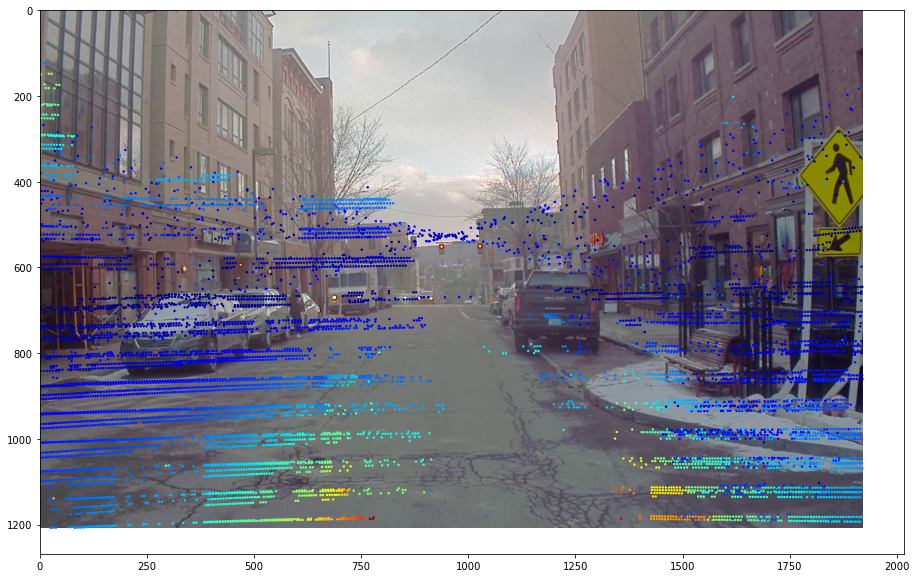

In [11]:
import matplotlib.pyplot as plt
from matplotlib import cm
import glob
import os 

cmap = cm.get_cmap('jet')

# lidar_file = '/home/yy785/carlos/SkynetData/GPS_plotting/location_matching/calib_test/data2/cache/lidar_203/data/1607112277437436'
# img_file = '/home/yy785/carlos/SkynetData/GPS_plotting/location_matching/calib_test/data2/cache/camera_front_left_60fov/1607112277504625.jpg'
# img_file = '/home/yy785/carlos/SkynetData/GPS_plotting/location_matching/calib_test/data2/cache/camera_front_left_60fov/1607112176637158.jpg'
# lidar_file = '/home/yy785/carlos/SkynetData/GPS_plotting/location_matching/calib_test/data2/cache/lidar_203/data/1607112176577423'
# img_file = '/home/xc429/Junan/calib_test/data2/cache/camera_front_left_60fov/1607111874001474.jpg'
# lidar_file = '/home/xc429/Junan/calib_test/data2/cache/lidar_203/data/1607111873997399'

img_root = '/home/yy785/carlos/SkynetData/dest_dir/amodal2/01-20-2021/'
lidar_root = '/home/yy785/carlos/SkynetData/dest_dir/amodal2/01-20-2021/'
imagesL = sorted(glob.glob(os.path.join(img_root, 'cache/camera_front_left_60fov/*')))
imagesR = sorted(glob.glob(os.path.join(img_root, 'cache/camera_front_right_60fov/*')))

# lidar_files = sorted(glob.glob(os.path.join(lidar_root, 'decoded_lidar/*')))
lidar_files = sorted(glob.glob(os.path.join(lidar_root, 'cache/unwrapped_velodyne/*')))
idx = 1000
img = plt.imread(imagesR[idx])
lidar_file = lidar_files[idx]

def load_pcl_from_bin5(bin_file_path):
    bin_pcd = np.fromfile(bin_file_path,dtype=np.float32)
    points = bin_pcd.reshape(-1,5)
    return points[:,:3],points[:,3],points[:,4]
def load_pcl_from_bin4(bin_file_path):
    bin_pcd = np.fromfile(bin_file_path,dtype=np.float32)
    points = bin_pcd.reshape(-1,4)
    return points[:,:3],points[:,3], None

pts, intensity, times = load_pcl_from_bin4(lidar_file)
pts_cam = np.dot(R_new,pts.T) + T_new.reshape(-1,1) 
pts_cam = np.dot(R_rel,pts.T) + T_rel.reshape(-1,1) 
pts_cam = pts_cam.T
pts = pts[pts_cam[:,2]>=0,:] 
pts_cam = pts_cam[pts_cam[:,2]>=0,:] 

pixels, _ = cv2.projectPoints(pts.reshape(1,-1,3), rvecs[0], tvecs[0], camera_matrix,  distortion_coefficients)
u = pixels[:,0,0]
v = pixels[:,0,1]
# pts within the img 
idx = (u>0)*(u<1920)*(v>0)*(v<1208)
u = u[idx]
v=v[idx]
plt.figure(figsize = (150,10))
plt.imshow(img)
plt.scatter(u,v,c=pts_cam[idx,2], s = 2,cmap = cmap)
